# Proyecto de optimización del Transporte en la logística de reforestación

## Técnicas Matemáticas Utilizadas:
*  Topología Algebraica y Topología de Datos (TDA): Uso de persistencia homológica y diagramas de persistencia para analizar la forma de los datos en diferentes escalas. Así como cálculo de nubes de puntos y simplicial complexes, lo cual es útil para detectar estructuras no lineales o patrones intrínsecos que otros métodos estadísticos podrían pasar por alto.
*  Simulación de datos sintéticos (con tadasets): Generación de datos artificiales como círculos, esferas, toros, útiles para validar métodos de análisis topológico y comparar resultados.

## Técnicas Computacionales Utilizadas:
*   Librerías Avanzadas: Como Gudhi, Ripser, Persim, que son librerías especializadas para análisis topológico.
scikit-learn: para clustering, reducción de dimensionalidad y validación de modelos.
*  Visualización matemática avanzada: Diagramas de persistencia, barcode plots y proyecciones en espacios reducidos (como PCA) para análisis visual.
os, random: para operaciones del sistema y aleatorización.

## Ventajas Aportadas al Proyecto:
*   Robustez frente al ruido: La persistencia homológica permite filtrar ruido y detectar patrones significativos en datos complejos.
*  No linealidad: A diferencia de técnicas tradicionales (como PCA o regresión lineal), el TDA puede identificar relaciones no lineales o de tipo topológico.
*   Validación visual y matemática: El uso combinado de visualización y distancias topológicas ofrece una validación tanto exploratoria como cuantitativa.

# Examen - Caso Práctico
Maritza Barrios Macías A00836821

## Importación de librerías

In [ ]:
pip install gudhi persim scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install POT

In [ ]:
pip install tadasets ripser gudhi persim

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install giotto_tda

In [ ]:
pip install scikit-tda

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install ripser

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install kmapper

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install gudhi ripser matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
from ripser import ripser
from persim import plot_diagrams, PersistenceImager
import gtda
import gudhi as gd
from persim import plot_diagrams, bottleneck, bottleneck_matching
from ripser import Rips
from ripser import ripser
from gudhi.wasserstein import wasserstein, wasserstein_distance
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceLandscape, PersistenceImage
from gudhi import RipsComplex
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from persim.landscapes import PersLandscapeApprox
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Carga de datos

In [ ]:
db_test = pd.read_csv('mitbih_test.csv')
db_train = pd.read_csv('mitbih_train.csv')

In [ ]:
db_train.head()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
db_train.shape

(87553, 188)

In [ ]:
db_test.shape

(21891, 188)

In [ ]:
# Eliminamos nulos
db_train.isnull().sum()
db_train = db_train.dropna()
db_test = db_test.dropna()
print(db_train.shape)
print(db_test.shape)

(87553, 188)
(21891, 188)


In [ ]:
# Observamos la cantidad de clases existentes en la base
valores_unicos = db_train.iloc[:, -1].unique()
print(valores_unicos)
valores_unicos1 = db_test.iloc[:, -1].unique()
print(valores_unicos)

[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]


## Preparación de los datos

In [ ]:
X_train = db_train.iloc[:, :-1].values  # Señal ECG
y_train = db_train.iloc[:, -1].values   # Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

In [ ]:
X_train = db_train.iloc[:, :-1].values
X_train[0].shape

(187,)

In [ ]:
# Se obtiene min/max para verificar si los datos se encuentran normalizados
min_per_beat = X_train.min(axis=1)
max_per_beat = X_train.max(axis=1)

print("Mínimo:", min_per_beat.min())
print("Máximo:", max_per_beat.max())

Mínimo: 0.0
Máximo: 1.0


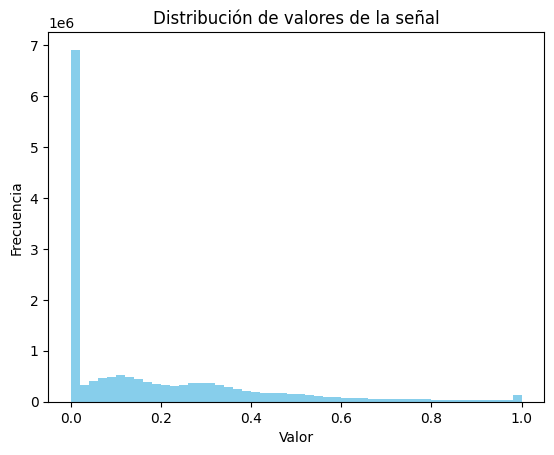

In [ ]:
#  Graficamos la distribución de los valores de las señales (observamos que van de 0 a 1)
plt.hist(X_train.flatten(), bins=50, color='skyblue')
plt.title("Distribución de valores de la señal")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

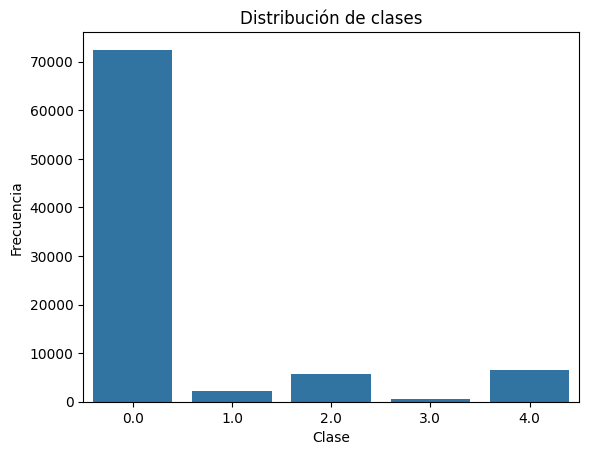

In [ ]:
# Cantidad por clase
sns.countplot(x=y_train)
plt.title("Distribución de clases")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
# Se observa desbalance de clases
clases, conteos = np.unique(y_train, return_counts=True)
for clase, conteo in zip(clases, conteos):
    print(f"Clase {clase}: {conteo} muestras")

Clase 0.0: 72470 muestras
Clase 1.0: 2223 muestras
Clase 2.0: 5788 muestras
Clase 3.0: 641 muestras
Clase 4.0: 6431 muestras


In [ ]:
# Obtenemos medidas estadísticas
pd.DataFrame(X_train).describe().T

,count,mean,std,min,25%,50%,75%,max
0,87553.0,0.890359,0.240910,0.0,0.921922,0.991342,1.000000,1.0
1,87553.0,0.758158,0.221814,0.0,0.682482,0.826007,0.910506,1.0
2,87553.0,0.423969,0.227305,0.0,0.250965,0.429467,0.578767,1.0
3,87553.0,0.219104,0.206880,0.0,0.048458,0.165992,0.341727,1.0
4,87553.0,0.201127,0.177058,0.0,0.082329,0.147870,0.258993,1.0
...,...,...,...,...,...,...,...,...
182,87553.0,0.003681,0.037193,0.0,0.000000,0.000000,0.000000,1.0
183,87553.0,0.003471,0.036255,0.0,0.000000,0.000000,0.000000,1.0
184,87553.0,0.003221,0.034790,0.0,0.000000,0.000000,0.000000,1.0
185,87553.0,0.002945,0.032865,0.0,0.000000,0.000000,0.000000,1.0


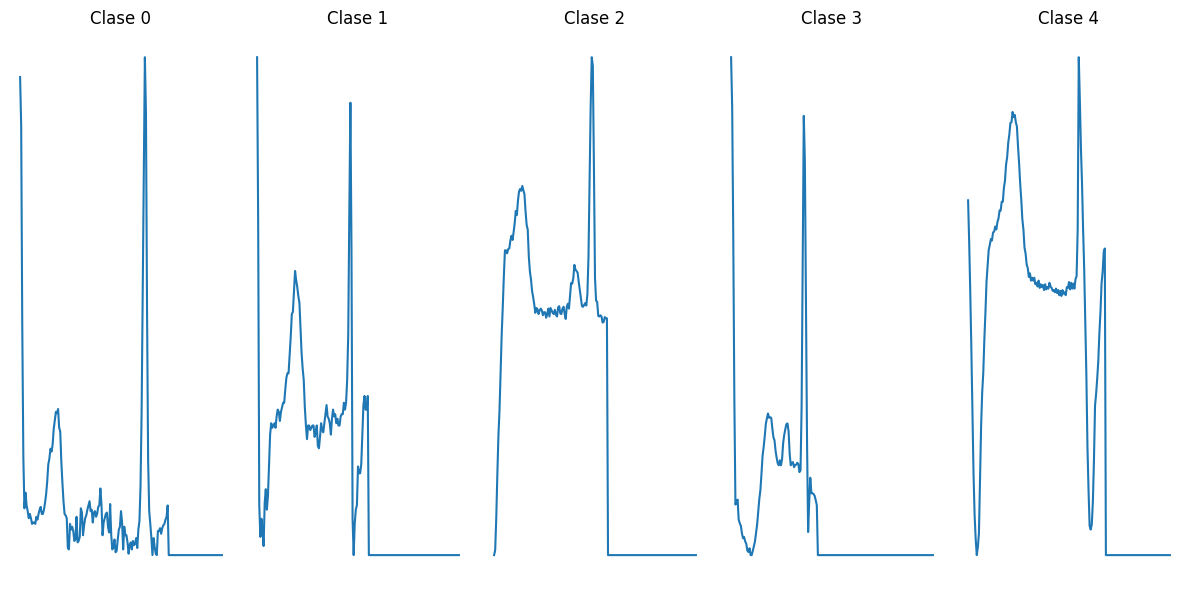

In [ ]:
# Se grafica el primer latido de cada clase para tener una idea del comportamiento por clase
classes = np.unique(y_train)

plt.figure(figsize=(12, 6))
for i, label in enumerate(classes):
    plt.subplot(1, len(classes), i+1)
    idx = np.where(y_train == label)[0][0]
    plt.plot(X_train[idx])
    plt.title(f"Clase {int(label)}")
    plt.axis('off')
plt.tight_layout()
plt.show()

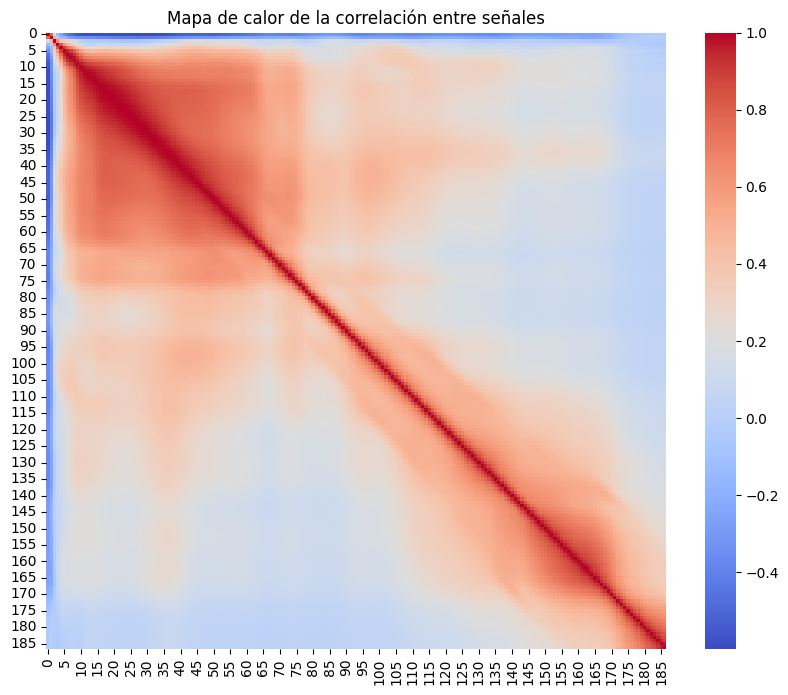

In [ ]:
# Matriz de correlación
correlation_matrix = np.corrcoef(X_train, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", cbar=True)
plt.title("Mapa de calor de la correlación entre señales")
plt.show()

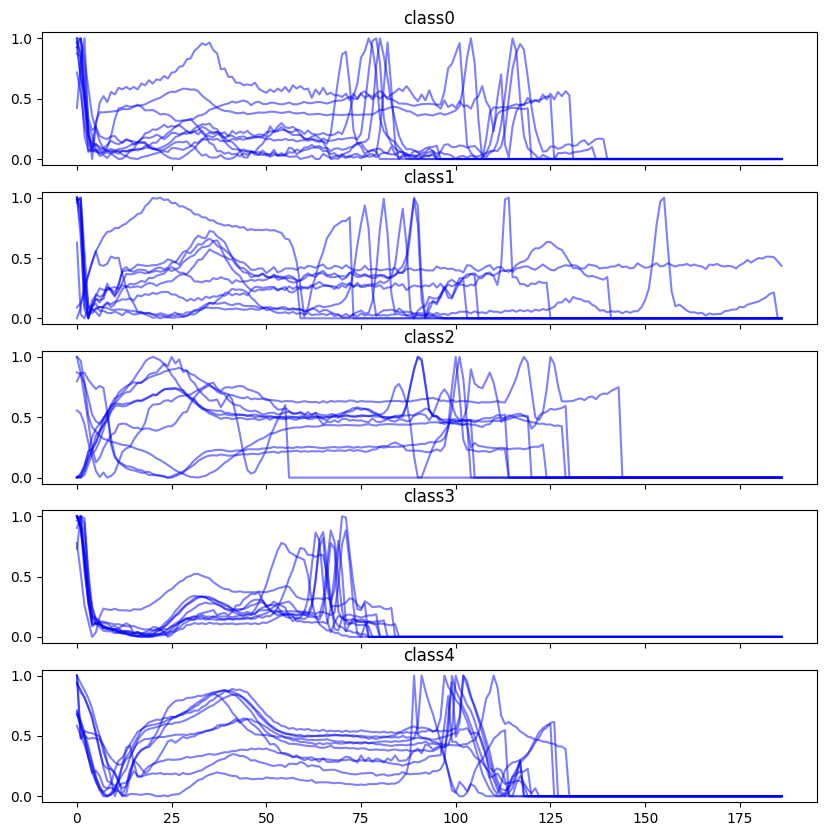

In [ ]:
# Se visualiza cómo se distribuyen las señales de ECG entre diferentes clases
def plot(x_data, y_data, classes=range(5), plots_per_class=10):

    f, ax = plt.subplots(5, sharex=True, sharey=True, figsize=(10,10))
    for i in classes:
        for j in range(plots_per_class):
            ax[i].set_title("class{}".format(i))
            ax[i].plot(x_data[y_data == i][j], color="blue", alpha=.5)

plot(X_train, y_train)

## Construcciones topológicas TDA

In [ ]:
# Convertir la señal en una dimensión a una nube de puntos dim3
def vector_to_point_cloud(signal, dim=3, delay=2):
    n_points = len(signal) - (dim - 1) * delay
    return np.array([signal[i:i + dim * delay:delay] for i in range(n_points)])

In [ ]:
# Visualiza el diagrama de persistencia para una señal de ECG
def diag_persis(signal, max_edge_length, dim=2, delay=2):
    cloud = vector_to_point_cloud(signal, dim=dim, delay=delay)
    skeleton = gd.RipsComplex(points=cloud, max_edge_length=max_edge_length)
    Rips_simplex_tree = skeleton.create_simplex_tree(max_dimension=dim)
    Barcodes_Rips = Rips_simplex_tree.persistence()
    gd.plot_persistence_diagram(Barcodes_Rips)
    plt.title(f'Persistence Diagram')
    plt.show()

# Calcula el diagrama de persistencia utilizando la persistencia de Vietoris-Rips
def compute_diagram(point_cloud, max_edge_length=2.0, dim=1):
    vr = VietorisRipsPersistence(homology_dimensions=[dim], max_edge_length=max_edge_length)
    diagram = vr.fit_transform([point_cloud])
    return diagram

# Genera una imagen de persistencia a partir del diagrama de persistencia
def plot_persistence_image(diagram, clase):
    pimgr = PersistenceImage(n_bins=50)
    image = pimgr.fit_transform(diagram)
    plt.imshow(image.squeeze(), origin='lower', aspect='auto')
    plt.colorbar(label='Persistence')
    plt.title(f"Persistence Image (Clase {clase})")
    plt.xlabel("Birth")
    plt.ylabel("Persistence")
    plt.tight_layout()
    plt.show()

    return image

# Genera el paisaje de persistencia a partir del diagrama
def plot_persistence_landscape(diagram, clase):
    pers_lands = PersistenceLandscape(n_layers=2)
    landscape = pers_lands.fit_transform(diagram)
    for i in range(landscape.shape[1]):
        plt.plot(landscape[0][i], label=f"Layer {i+1}")
    plt.title(f"Persistence Landscape (Clase {clase})")
    plt.xlabel("Filtration value")
    plt.ylabel("Landscape value")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
X_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87548,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87549,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


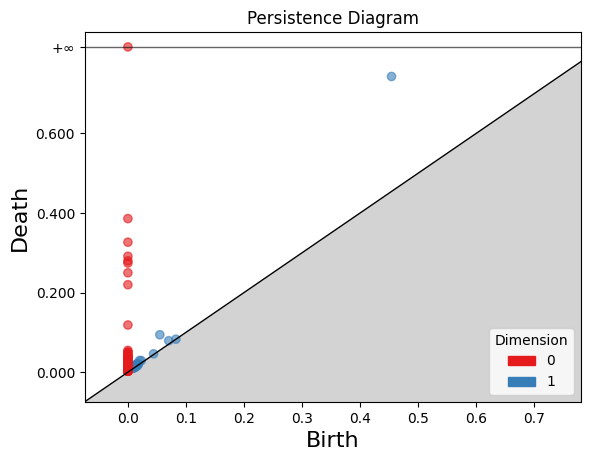

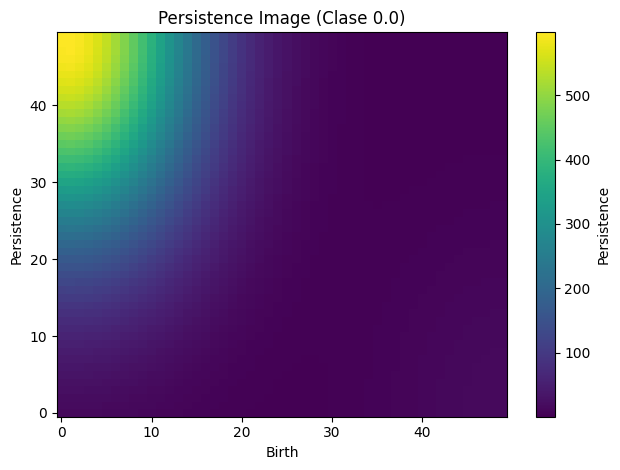

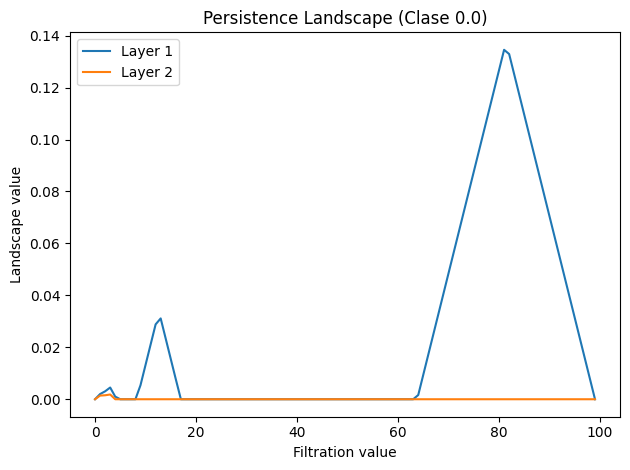

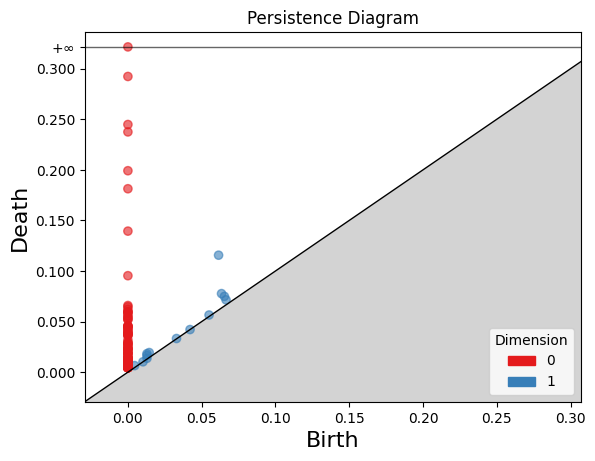

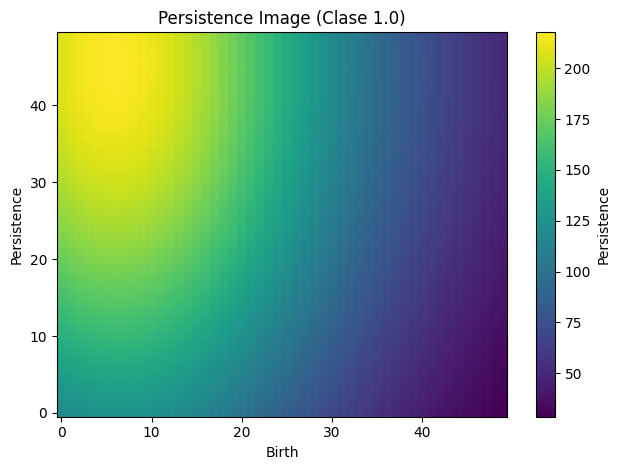

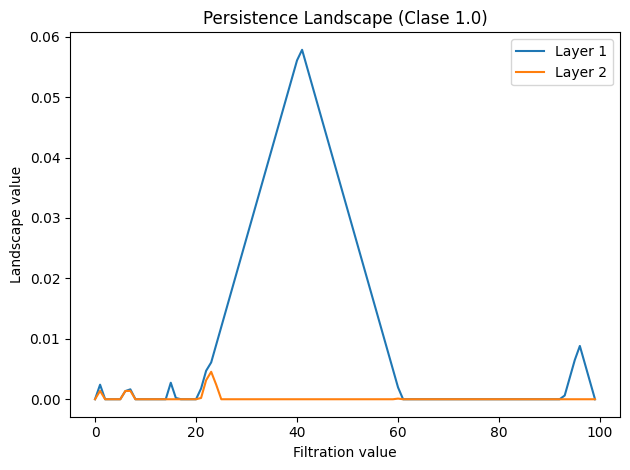

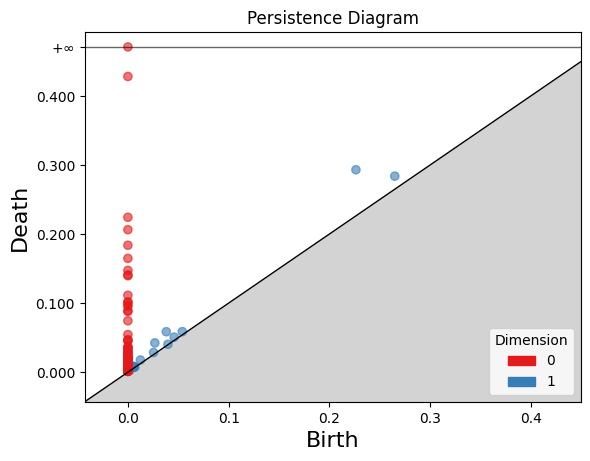

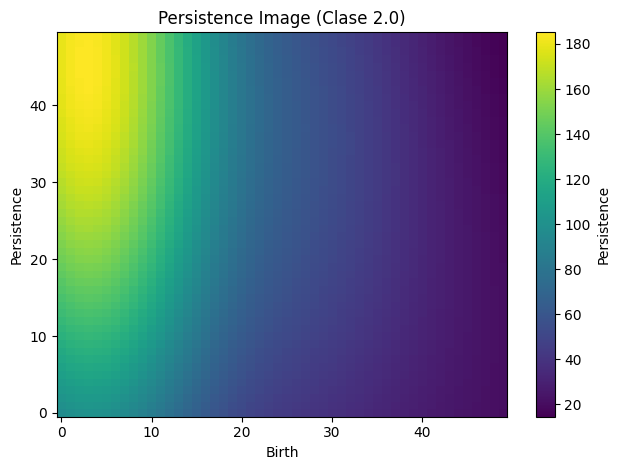

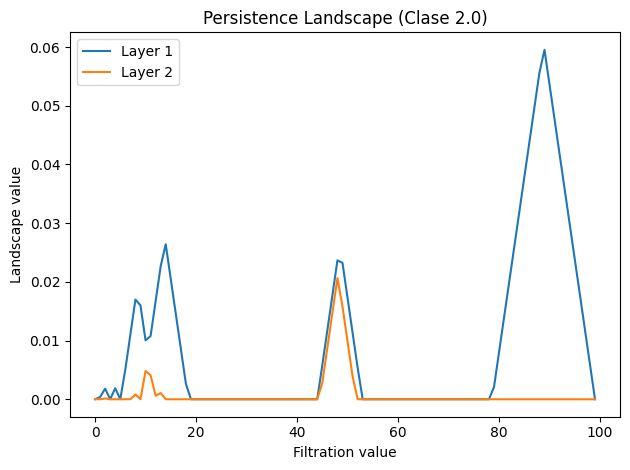

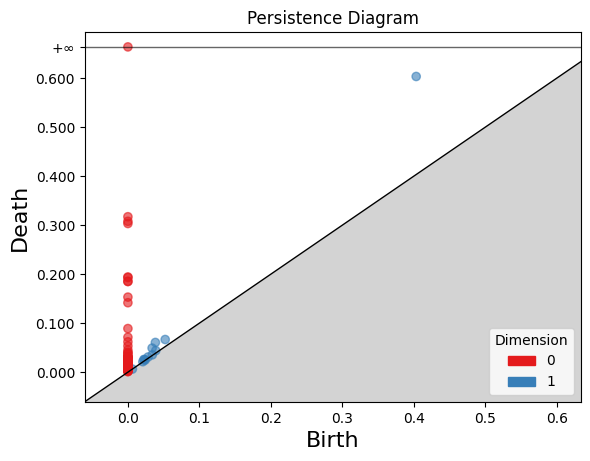

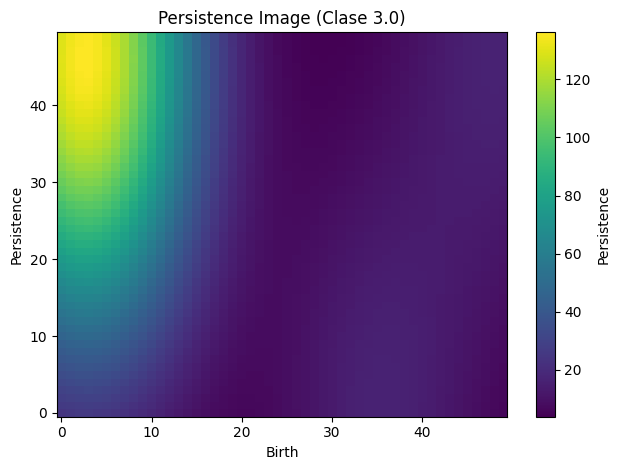

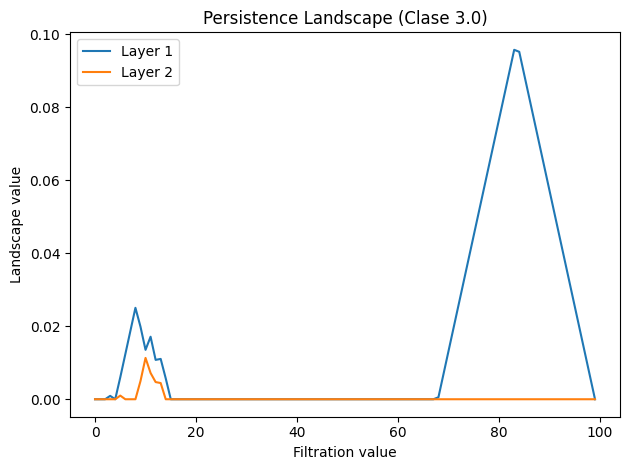

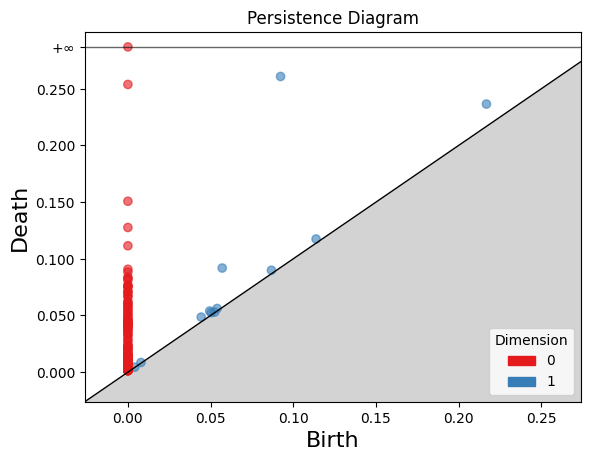

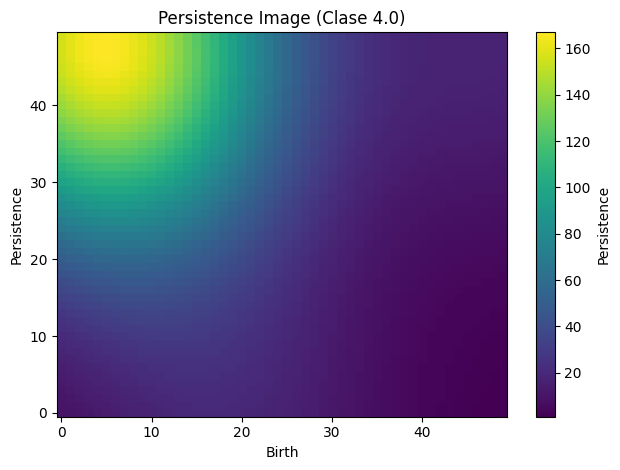

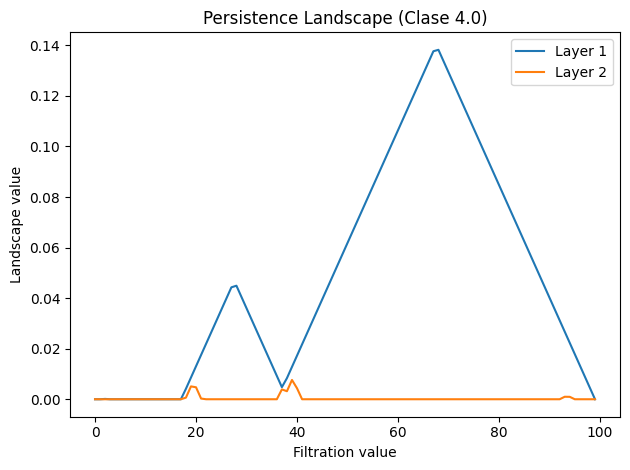

In [ ]:
for clase in np.unique(y_train):
    idx = np.where(y_train == clase)[0][0]
    signal = X_train[idx]

    diag_persis(signal, max_edge_length=2.0, dim=2, delay=2)

    cloud = vector_to_point_cloud(signal, dim=3, delay=2)
    diagram = compute_diagram(cloud, max_edge_length=2.0, dim=1)

    _ = plot_persistence_image(diagram, clase=clase)
    _ = plot_persistence_landscape(diagram, clase=clase)


## Análisis

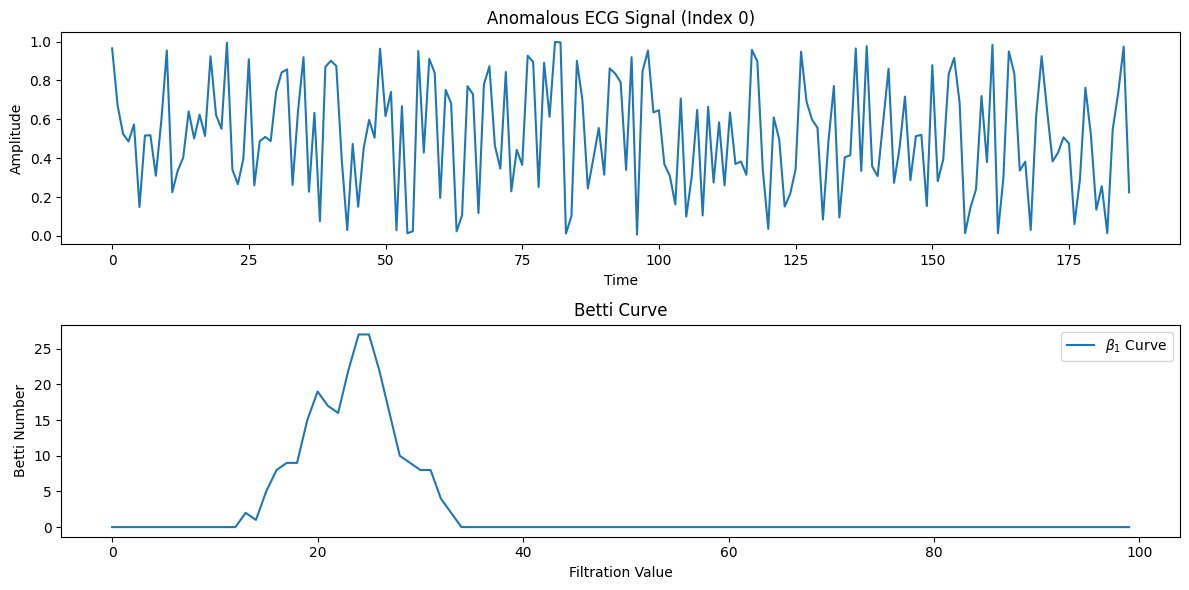

In [ ]:
# Se convierte la señal en una nube de puntos usando incrustación de retardo
def vector_to_point_cloud(signal, dim=3, delay=2):
    n_points = len(signal) - (dim - 1) * delay
    return np.array([signal[i:i + dim * delay:delay] for i in range(n_points)])

# Calcula el diagrama de persistencia de una señal utilizando la homología persistente (Ripser).
def compute_persistence_diagram(signal, dim=1, max_edge_length=2.0):
    point_cloud = vector_to_point_cloud(signal, dim=3, delay=2)
    diagrams = ripser(point_cloud, maxdim=dim, thresh=max_edge_length)['dgms']
    return diagrams

# Calcula las curvas de Betti a partir de un conjunto de diagramas de persistencia.
def compute_betti_curves(diagrams, resolution=100, min_range=0.01, max_range=1.0):
    filtration_values = np.linspace(min_range, max_range, resolution)
    betti_curves = []
    for dim, diagram in enumerate(diagrams):
        betti_curve = np.zeros_like(filtration_values)
        for birth, death in diagram:
            betti_curve += (filtration_values >= birth) & (filtration_values < death)
        betti_curves.append(betti_curve)
    return filtration_values, betti_curves

# Detecta señales anómalas evaluando si las curvas de Betti 1 superan un umbral dado.
def detect_anomalies(ecg_signals, threshold=0.5):
    anomalies = []
    for idx, signal in enumerate(ecg_signals):
        diagrams = compute_persistence_diagram(signal)
        _, betti_curves = compute_betti_curves(diagrams)
        if len(betti_curves) > 1 and np.max(betti_curves[1]) > threshold:
            anomalies.append(idx)
    return anomalies


# Ejemplo
X_train1 = np.random.rand(100, 187)
ecg_signals = X_train1[:100]

# Detecta índices de señales anómalas con base en curvas de Betti 1 mayores al umbral.
anomalies = detect_anomalies(ecg_signals, threshold=5)

# Si se detecta una anomalía, grafica la señal y su curva de Betti 1.
if anomalies:
    idx = anomalies[0]
    signal = ecg_signals[idx]
    diagrams = compute_persistence_diagram(signal)
    _, betti_curves = compute_betti_curves(diagrams)

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(signal)
    plt.title(f"Anomalous ECG Signal (Index {idx})")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

    plt.subplot(2, 1, 2)
    if len(betti_curves) > 1:
        plt.plot(betti_curves[1], label=r'$\beta_1$ Curve')
    plt.title("Betti Curve")
    plt.xlabel("Filtration Value")
    plt.ylabel("Betti Number")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No anomalies detected.")

## Betti Curves

In [ ]:
# Extrae las curvas de Betti a partir de una nube de puntos
def extract_betti_curves(point_cloud, min_range=0.01, max_range=1.0, resolution=100):
    diagrams = ripser(point_cloud, maxdim=1)['dgms']
    H0 = diagrams[0]  # Betti-0: componentes conexas
    H1 = diagrams[1]  # Betti-1: ciclos (agujeros)

    filtration_values = np.linspace(min_range, max_range, resolution)
    # Extrae el diagrama de Betti-0 (componentes conexas)
    betti0_curve = np.zeros_like(filtration_values)
    # Extrae el diagrama de Betti-1 (agujeros)
    betti1_curve = np.zeros_like(filtration_values)

    for i, t in enumerate(filtration_values):
        betti0_curve[i] = sum(1 for birth, death in H0 if birth <= t < death)
        betti1_curve[i] = sum(1 for birth, death in H1 if birth <= t < death)

    return filtration_values, betti0_curve, betti1_curve

# Grafica las curvas de Betti-0 y Betti-1 para una clase dada
def plot_betti_curves(filtration_values, betti0, betti1, clase='?'):
    plt.figure(figsize=(10, 4))
    plt.plot(filtration_values, betti0, label=r'$\beta_0$ (componentes)')
    plt.plot(filtration_values, betti1, label=r'$\beta_1$ (agujeros)')
    plt.title(f'Curvas de Betti (Clase {clase})')
    plt.xlabel('Valor de filtración')
    plt.ylabel('Número de Betti')
    plt.legend()
    plt.grid(True)
    plt.show()

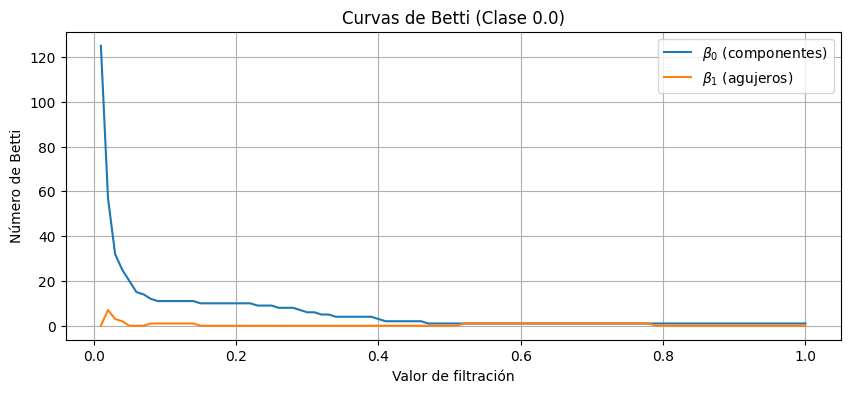

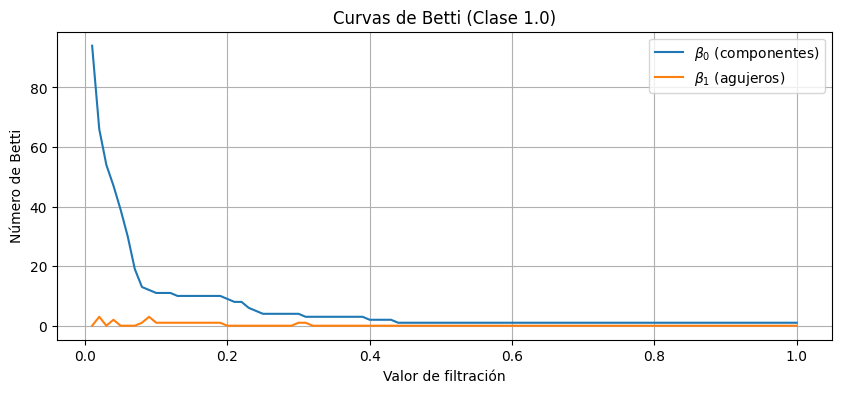

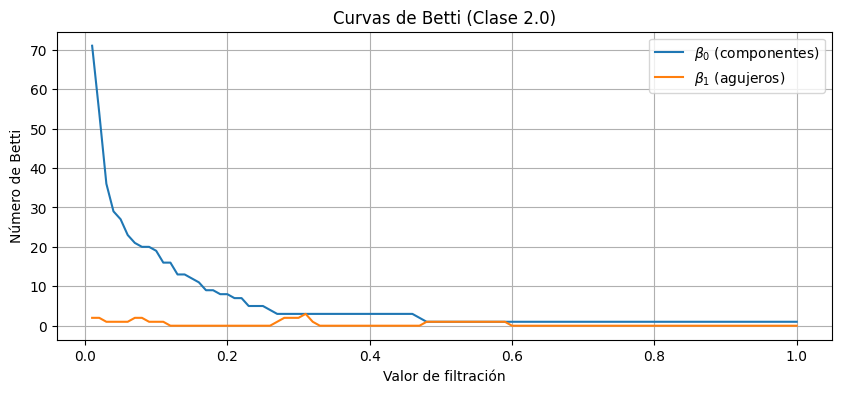

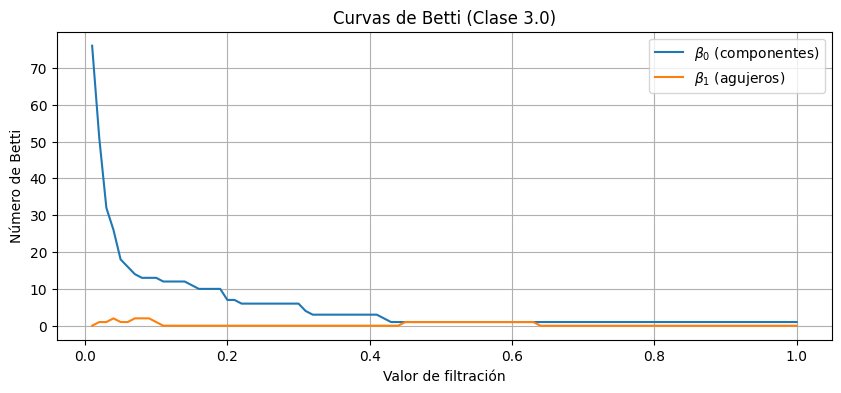

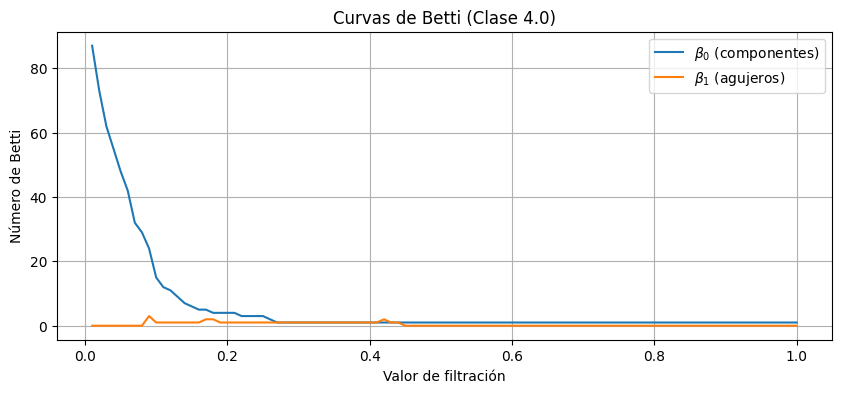

In [ ]:
#  Se grafican las curvas de Betti para una señal representativa de cada clase
# Usa la primera señal disponible por clase
clases = np.unique(y_train)

for clase in clases:
    idx = np.where(y_train == clase)[0][0]
    signal = X_train[idx]
    cloud = vector_to_point_cloud(signal, dim=3, delay=2)
    fvals, betti0, betti1 = extract_betti_curves(cloud)
    plot_betti_curves(fvals, betti0, betti1, clase=clase)

## Primer modelo con Betti Curves

In [ ]:
subsample_size = 100
X_train_subsampled, _, y_train_subsampled, _ = train_test_split(
    X_train, y_train, train_size=0.1, stratify=y_train
)

# Función para convertir la señal a un punto en el espacio 3D
def vector_to_point_cloud(signal, dim=3, delay=2):
    n = len(signal)
    points = []
    for i in range(n - delay * (dim - 1)):
        point = [signal[i + j * delay] for j in range(dim)]
        points.append(point)
    return np.array(points)

# Función para extraer las curvas de Betti
def extract_betti_curves(point_cloud, min_range=0.01, max_range=1.0, resolution=100):
    # Calcular diagramas de persistencia
    ripser_output = ripser(point_cloud, maxdim=1, thresh=max_range)
    # Obtener la filtración
    fvals = np.linspace(min_range, max_range, resolution)
    # Extraer las curvas de Betti
    betti0 = np.zeros(resolution)  # H0
    betti1 = np.zeros(resolution)  # H1

    for i, threshold in enumerate(fvals):
        betti0[i] = len([d for d in ripser_output['dgms'][0] if d[1] <= threshold])
        betti1[i] = len([d for d in ripser_output['dgms'][1] if d[1] <= threshold])

    return fvals, betti0, betti1

# Función para extraer las características de Betti
def extraer_features_betti(fvals, betti):
    return {
        'auc': auc(fvals, betti),
        'max_betti': np.max(betti),
        'mean_betti': np.mean(betti),
        'std_betti': np.std(betti),
    }

# Extraer características de Betti para todas las señales de X_train
features_list = []
for i in range(len(X_train_subsampled)):
    signal = X_train_subsampled[i]
    clase = y_train_subsampled[i]

    # Convertir la señal en un punto en el espacio
    cloud = vector_to_point_cloud(signal, dim=3, delay=2)

    # Calcular las curvas de Betti
    fvals, betti0, betti1 = extract_betti_curves(cloud)

    features = extraer_features_betti(fvals, betti0)
    features['class'] = clase
    features_list.append(features)


df_features = pd.DataFrame(features_list)
print(df_features.head())


       auc  max_betti  mean_betti  std_betti  class
0  135.475      141.0      136.52  10.852170    0.0
1  176.550      182.0      177.88  12.085760    2.0
2  116.540      123.0      117.27  13.961988    0.0
3   90.050       95.0       90.63   8.495475    0.0
4  141.795      148.0      142.64  14.854306    0.0


In [ ]:
X = df_features.drop(columns='class')
y = df_features['class']

# Entrenamiento y evaluación del modelo (Random Forest)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.2, stratify=y)
clf = RandomForestClassifier()
clf.fit(X_train_split, y_train_split)
y_pred = clf.predict(X_test_split)

print(classification_report(y_test_split, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      1449
         1.0       0.39      0.16      0.23        44
         2.0       0.45      0.16      0.24       116
         3.0       0.33      0.08      0.12        13
         4.0       0.60      0.58      0.59       129

    accuracy                           0.84      1751
   macro avg       0.53      0.39      0.42      1751
weighted avg       0.81      0.84      0.82      1751



## Modelo Red Neuronal sin features topológicos

In [ ]:
X_train = db_train.iloc[:, :-1].values  # 187 features
y_train = db_train.iloc[:, -1].values  # Target
X_test = db_test.iloc[:, :-1].values
y_test = db_test.iloc[:, -1].values

In [ ]:
# Crea un codificador de etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)
y_encoded

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
# Crea un codificador de etiquetas
label_enc2 = LabelEncoder()
y_test = label_enc2.fit_transform(y_test)
y_test

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
# Separa los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Normaliza los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# Crea red neuronal
model = Sequential([ # Define un modelo secuencial
    Dense(512, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    LeakyReLU(alpha=0.3),
    Dropout(0.5),

    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.3),
    Dropout(0.5),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.3),
    Dropout(0.5),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.3),
    Dense(5, activation='softmax')
])
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 512)            │        96,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_30 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_31 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_32 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_33 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 272,901 (1.04 MB)

 Trainable params: 270,981 (1.03 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
# Compila el modelo, especificando el optimizador, la función de pérdida y la métrica
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Se entrena la red con validación y parada temprana para evitar sobreajuste.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=64,
                    verbose=1,
                   callbacks=[early_stopping])

Epoch 1/100
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8167 - loss: 0.5927 - val_accuracy: 0.9455 - val_loss: 0.1954
Epoch 2/100
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9299 - loss: 0.2395 - val_accuracy: 0.9524 - val_loss: 0.1699
Epoch 3/100
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9403 - loss: 0.2085 - val_accuracy: 0.9588 - val_loss: 0.1438
Epoch 4/100
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9462 - loss: 0.1890 - val_accuracy: 0.9600 - val_loss: 0.1409
Epoch 5/100
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9492 - loss: 0.1771 - val_accuracy: 0.9635 - val_loss: 0.1298
Epoch 6/100
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9517 - loss: 0.1692 - val_accuracy: 0.9642 - val_loss: 0.1266
Epoch 7/100
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9529 - loss: 0.1649 - val_accuracy: 0.9652 - val_loss: 0.1229
Epoch 8/100
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9541 - loss: 0

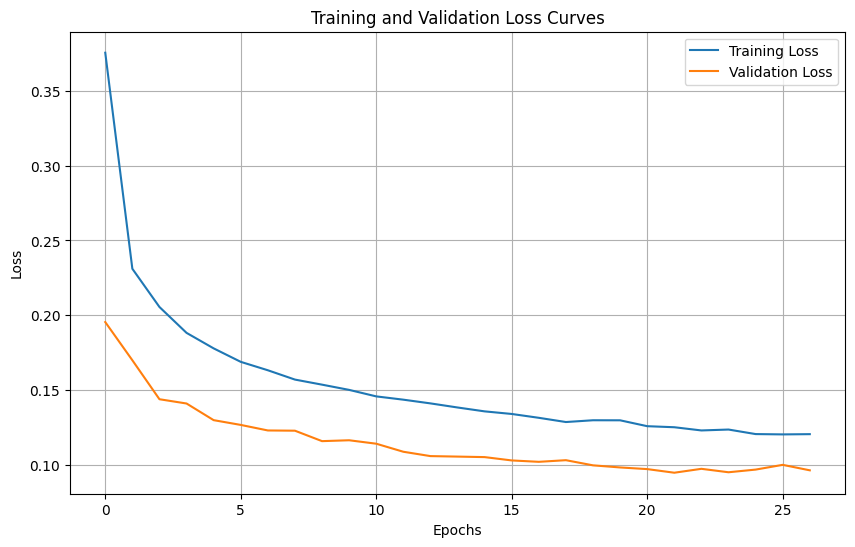

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot de las curvas de pérdida
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose =0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 97.27%


In [ ]:
# Predicción y evaluación del modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

685/685 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18117
           1       0.92      0.58      0.71       556
           2       0.93      0.91      0.92      1448
           3       0.79      0.52      0.63       162
           4       0.99      0.96      0.97      1608

    accuracy                           0.97     21891
   macro avg       0.92      0.79      0.84     21891
weighted avg       0.97      0.97      0.97     21891



## Modelo red neuronal con features topológicas

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_34 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_35 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_36 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,037 (47.02 KB)

 Trainable params: 11,589 (45.27 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4205 - loss: 1.5973 - val_accuracy: 0.8275 - val_loss: 1.0039
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.7316 - loss: 0.9364 - val_accuracy: 0.8332 - val_loss: 0.6954
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.7720 - loss: 0.8125 - val_accuracy: 0.8310 - val_loss: 0.6238
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.7865 - loss: 0.7565 - val_accuracy: 0.8332 - val_loss: 0.5999
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.7996 - loss: 0.7140 - val_accuracy: 0.8304 - val_loss: 0.5885
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.8079 - loss: 0.6907 - val_accuracy: 0.8287 - val_loss: 0.5816
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.8051 - loss: 0.7021 - val_accuracy: 0.8315 - val_loss: 0.5707
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.8211 - loss: 0.6

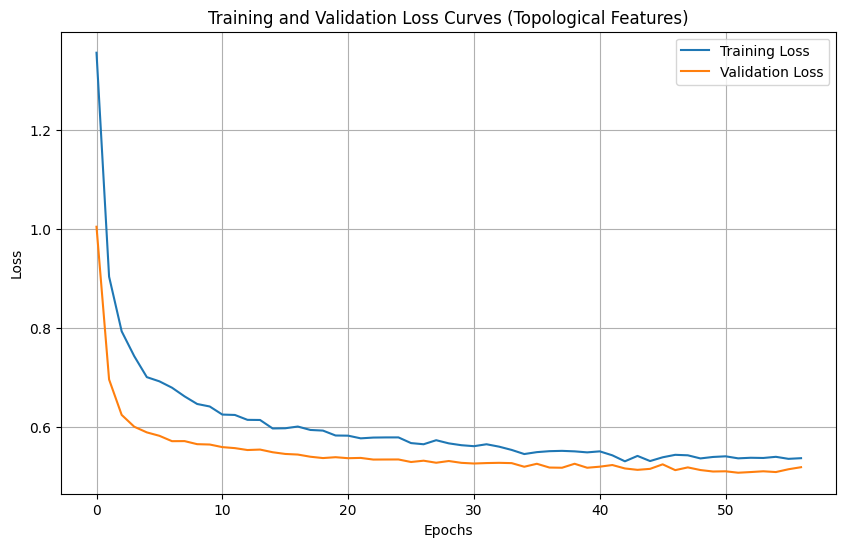

Validation Accuracy: 84.64%
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1459
         1.0       0.00      0.00      0.00        52
         2.0       0.00      0.00      0.00       119
         3.0       0.00      0.00      0.00        15
         4.0       0.81      0.28      0.42       106

    accuracy                           0.85      1751
   macro avg       0.33      0.26      0.27      1751
weighted avg       0.75      0.85      0.79      1751



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [ ]:
if 'df_features' not in locals():
    features_list = []
    for i in range(len(X_train_subsampled)):
        signal = X_train_subsampled[i]
        clase = y_train_subsampled[i]

        # Convierte la señal en una nube de puntos
        cloud = vector_to_point_cloud(signal, dim=3, delay=2)

        # Calcula las curvas de Betti
        fvals, betti0, betti1 = extract_betti_curves(cloud)

        # Extrae las características de Betti
        features = extraer_features_betti(fvals, betti0)
        features['class'] = clase
        features_list.append(features)


    df_features = pd.DataFrame(features_list)
X_topo = df_features.drop(columns='class').values
y_topo = df_features['class'].values

# Separación de los datos en conjuntos de entrenamiento y validación
X_train_topo, X_val_topo, y_train_topo, y_val_topo = train_test_split(X_topo, y_topo, test_size=0.2, random_state=42)

# Normaliza las características
scaler_topo = StandardScaler()
X_train_topo = scaler_topo.fit_transform(X_train_topo)
X_val_topo = scaler_topo.transform(X_val_topo)

# Define la red neuronal
model_topo = Sequential([
    Dense(128, input_shape=(X_train_topo.shape[1],)),
    BatchNormalization(),
    LeakyReLU(alpha=0.3),
    Dropout(0.5),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.3),
    Dropout(0.5),

    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.3),
    Dropout(0.5),

    Dense(len(np.unique(y_topo)), activation='softmax')  #
])

model_topo.summary()

# Compila el modelo
model_topo.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Entrenamiento del modelo con validación y parada temprana
early_stopping_topo = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_topo = model_topo.fit(X_train_topo, y_train_topo,
                              validation_data=(X_val_topo, y_val_topo),
                              epochs=100,
                              batch_size=64,
                              verbose=1,
                              callbacks=[early_stopping_topo])

# Evaluación del modelo
train_loss_topo = history_topo.history['loss']
val_loss_topo = history_topo.history['val_loss']

# Plot de las curvas de pérdida
plt.figure(figsize=(10, 6))
plt.plot(train_loss_topo, label='Training Loss')
plt.plot(val_loss_topo, label='Validation Loss')
plt.title('Training and Validation Loss Curves (Topological Features)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluación del modelo en el conjunto de validación
loss_topo, accuracy_topo = model_topo.evaluate(X_val_topo, y_val_topo, verbose=0)
print(f"Validation Accuracy: {accuracy_topo * 100:.2f}%")

# Predicción y evaluación del modelo
y_pred_topo = model_topo.predict(X_val_topo)
y_pred_classes_topo = np.argmax(y_pred_topo, axis=1)
print(classification_report(y_val_topo, y_pred_classes_topo))

## Modelo PCA - SVM

In [ ]:
# Subconjunto de entrenamiento, 800 muestras
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=800, stratify=y_train)
# Verificamos que haya datos de todas las clases
print("Clases en el subconjunto de entrenamiento:", np.unique(y_train_subset))

# Diagramas de persistencia
diagrams_train = []
signals_train = [X_train_subset[i, :] for i in range(X_train_subset.shape[0])]

# Convertir cada señal en una nube de puntos y calcular el diagrama de persistencia
for signal in signals_train:
    pc = vector_to_point_cloud(signal)
    dgms = ripser(pc, maxdim=1)['dgms']

    if len(dgms) > 1:
        diagrams_train.append(dgms[1])
    else:
        diagrams_train.append(np.empty((0, 2)))

X_tda = []
# Extraer características topológicas de cada diagrama de persistencia
for dg in diagrams_train:
    pl = PersLandscapeApprox(dgms=[[], dg], hom_deg=1)
    X_tda.append(pl.values.flatten())

max_len = max([len(pl.flatten()) for pl in X_tda])


X_tda_fixed = []
# Rellenar con ceros para que todas las características tengan la misma longitud
for pl in X_tda:
    fixed_pl = np.pad(pl.flatten(), (0, max_len - len(pl.flatten())), mode='constant')
    X_tda_fixed.append(fixed_pl)

# PCA
pca = PCA(n_components=0.95)
X_tda_pca = pca.fit_transform(X_tda_fixed)

# Creación del clasificador SVM
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_tda_pca, y_train_subset)

# Predicción
y_pred = svm.predict(X_tda_pca)
print(classification_report(y_train_subset, y_pred))


Clases en el subconjunto de entrenamiento: [0 1 2 3 4]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       661
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        59

    accuracy                           0.83       800
   macro avg       0.17      0.20      0.18       800
weighted avg       0.68      0.83      0.75       800



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [ ]:
classes, counts = np.unique(y_train_subset, return_counts=True)

for cls, count in zip(classes, counts):
    print(f"Clase {cls}: {count} muestras")

Clase 0: 661 muestras
Clase 1: 21 muestras
Clase 2: 53 muestras
Clase 3: 6 muestras
Clase 4: 59 muestras


## Mapper

In [ ]:
import pandas as pd
import kmapper as km
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Preprocesar los datos - Normalización
scaler = MinMaxScaler()
X_train = db_train.iloc[:, :-1]
X_test = db_test.iloc[:, :-1]

X_train.columns = [f"feature_{i}" for i in range(X_train.shape[1])]
X_test.columns = X_train.columns

# Normalizar las señales de ECG
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Se crea el objeto Kepler Mapper
mapper = km.KeplerMapper(verbose=1)

# Aplicar un filtro (proyección usando PCA con 2 componentes)
lens = mapper.fit_transform(X_train_scaled, projection=PCA(n_components=2))

# Se crea el grafo con DBSCAN para el agrupamiento
graph = mapper.map(lens,
                   X_train_scaled,
                   clusterer=DBSCAN(eps=0.5, min_samples=5),
                   cover=km.Cover(n_cubes=10, perc_overlap=0.3))

# Visualización
mapper.visualize(graph,
                 path_html="mapper_output.html",
                 title="Mapper con señales ECG")

# Convertir a características de nodo (centralidad, grado)
# Se toman como características el número de nodos a los que pertenece cada punto
node_features = [sum(1 for node, indices in graph['nodes'].items() if i in indices) for i in range(len(X_train_scaled))]

# Visualización adicional
plt.figure(figsize=(10, 7))
mapper.visualize(graph, path_html="mapper_output_with_features.html", title="Mapper con características de ECG")
plt.show()


KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: PCA(n_components=2)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (87553, 187)

..Projecting data using: 
	PCA(n_components=2)


..Scaling with: MinMaxScaler()

Mapping on data shaped (87553, 187) using lens shaped (87553, 2)

Creating 100 hypercubes.

Created 1739 edges and 1543 nodes in 0:00:05.807716.
Wrote visualization to: mapper_output.html
Wrote visualization to: mapper_output_with_features.html


<Figure size 1000x700 with 0 Axes>